<h5 style="color:green"> All Models' features need to be 2D Arrays even if there is one feature </h3>
<ul>
<li> To be implemented :
    <ul>
        <li> DBSCAN and HDBSCAN
        <li> UMAP
        <li> Reinforcement Learning
        <li> AlphaZero
        <li> Factorization Methods
        <li> Convolutional Neural Networks
        <li> RNN + LSTM
        <li> Transformers
    </ul>
<li> Needs Better Implementations :
    <ul>
        <li> Faster BallTree / KDTree Algorithms for KNN
    </ul>
</ul>

In [8]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier as SklearnGBC
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier as SklearnAdaBoost
from sklearn.impute import SimpleImputer as SklearnSimpleImputer
from sklearn.impute import KNNImputer as SklearnKNNImputer
from sklearn.model_selection import cross_val_score as sk_cross_val_score
from sklearn.model_selection import GridSearchCV as SklearnGridSearchCV
from sklearn.model_selection import train_test_split as sklearn_train_test_split
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.preprocessing import LabelEncoder as SklearnLabelEncoder
from sklearn.preprocessing import OrdinalEncoder as SklearnOrdinalEncoder
from sklearn.feature_selection import SelectKBest as SklearnSelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel as SklearnSelectFromModel
from sklearn.feature_selection import RFE as SklearnRFE

from ZAIScikit import decision_tree
from ZAIScikit import bagging
from ZAIScikit import linear_models
from ZAIScikit import naive_bayes
from ZAIScikit import nearest_neighbors
from ZAIScikit.boosting import GradientBoostingClassifier, AdaBoostClassifier
from ZAIScikit.imputation import SimpleImputer, KNNImputer
from ZAIScikit.splitting import KFold
from ZAIScikit.grid_search import GridSearchCV
from ZAIScikit.splitting import train_test_split
from ZAIScikit.encoding import OneHotEncoder, LabelEncoder, OrdinalEncoder
from ZAIScikit.feature_selection import RFE, SelectFromModel, SelectKBest

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pickle

import time
import matplotlib.pyplot as plt

In [9]:
def load_dataset(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

In [10]:
def compareModels(models, data, targets, metric):
    X_train, X_test = data
    y_train, y_test = targets
    
    performances = []
    times = []

    for i, model in enumerate(models):
        print(f"Model {i}")
        start = time.perf_counter()
        model.fit(X_train, y_train)
        end = time.perf_counter()
        
        predictions = model.predict(X_test)
        performance = metric(y_test, predictions)
        time_taken = end - start
        
        print(f"Time to fit : {time_taken} s")
        print(f"Performance : {performance}")
        
        performances.append(performance)
        times.append(time_taken)
        
        # Plot predictions vs actual
        plt.figure(figsize=(12, 6))
        plt.plot(y_test, label='Actual')
        plt.plot(predictions, label=f'Model {i} Predictions')
        plt.legend()
        plt.title(f'Model {i} Predictions vs Actual')
        plt.show()

    # Plotting performance differences
    labels = [f'Model {i}' for i in range(len(models))]
    
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    color = 'tab:blue'
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Mean Squared Error', color=color)
    ax1.bar(x - width/2, performances, width, label='MSE', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Time to Fit (s)', color=color)
    ax2.bar(x + width/2, times, width, label='Time to Fit', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    plt.title('Model Performance and Training Time')
    plt.show()


In [11]:
df = load_dataset("citiesSmall.pkl")
X = df['X']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
X_train.shape

(300, 2)

c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Your KMeans Cluster Centers:
[[-2.66780392  8.93576069]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]]

Sklearn's KMeans Cluster Centers:
[[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]]

Your KMeans Labels:
[1. 2. 0. 2. 1. 2. 0. 2. 2. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 2. 1. 1. 1. 1. 2. 2. 1. 0. 0. 0. 0. 2. 2. 1. 0. 2. 0. 0. 2. 1. 1.
 1. 2. 2. 2. 0. 1. 1. 1. 0. 0. 2. 0. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1.
 1. 0. 2. 1. 2. 1. 2. 2. 0. 2. 0. 1. 0. 0. 0. 2. 0. 2. 2. 2. 0. 2. 0. 0.
 0. 2. 1. 0.]

Sklearn's KMeans Labels:
[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


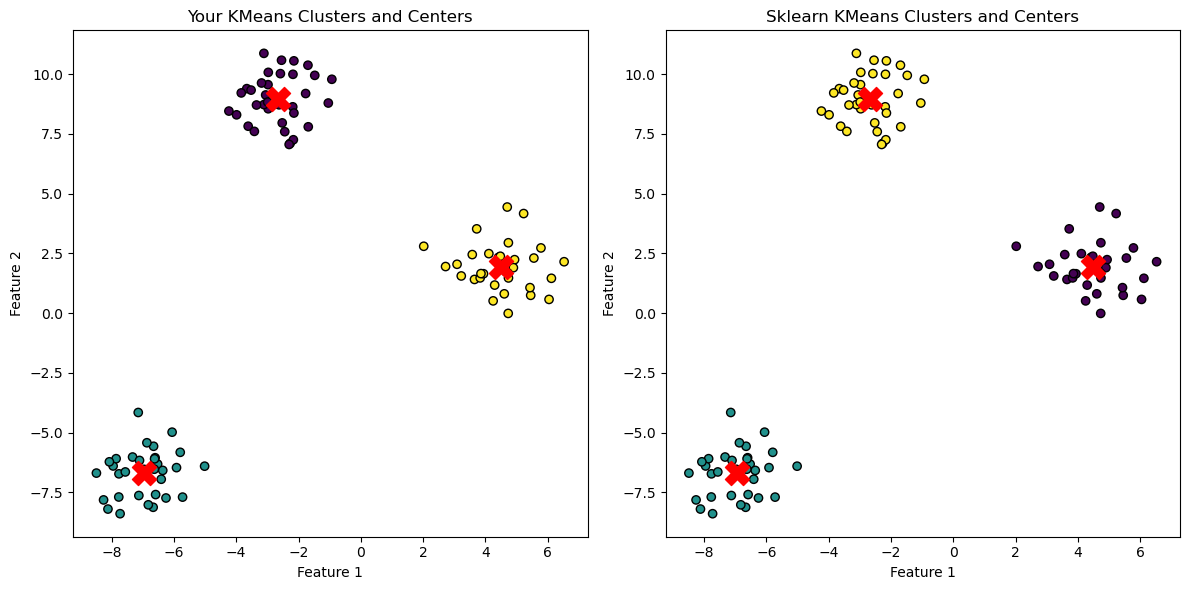

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SklearnKMeans
from ZAIScikit.kmeans import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Instantiate and fit KMeans implementation
kmeans_model = KMeans(num_clusters=3, max_iterations=100)
kmeans_model.fit(X)

# Instantiate and fit sklearn's KMeans
sklearn_kmeans = SklearnKMeans(n_clusters=3, max_iter=100)
sklearn_kmeans.fit(X)

# Compare cluster centers
print("Your KMeans Cluster Centers:")
print(kmeans_model.centroids)
print("\nSklearn's KMeans Cluster Centers:")
print(sklearn_kmeans.cluster_centers_)

# Compare labels
your_labels = kmeans_model.transform(X)
sklearn_labels = sklearn_kmeans.predict(X)
print("\nYour KMeans Labels:")
print(your_labels)
print("\nSklearn's KMeans Labels:")
print(sklearn_labels)

# Plotting the data points and cluster centers
plt.figure(figsize=(12, 6))

# Plot data points with your KMeans labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=your_labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans_model.centroids[:, 0], kmeans_model.centroids[:, 1], s=300, c='red', marker='X')
plt.title("Your KMeans Clusters and Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot data points with sklearn's KMeans labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(sklearn_kmeans.cluster_centers_[:, 0], sklearn_kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("Sklearn KMeans Clusters and Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

Transformed data using your PCA:
[[ 0.12893433  0.00552079 -0.09370797]
 [ 0.41533495 -0.00333602 -0.41972944]
 [ 0.12969153  0.16412773 -0.62603473]
 [ 0.24650397 -0.14045993  0.23768159]
 [ 0.16207752  0.14991566 -0.56898737]
 [ 0.13934388 -0.43966464 -0.29926161]
 [-0.20657412  0.29988263 -0.22675732]
 [ 0.45644469  0.14116105 -0.08405428]
 [-0.08338814 -0.44010773  0.28364689]
 [-0.40669395 -0.16223567 -0.08345219]
 [-0.07822468 -0.54689644 -0.24763786]
 [-0.32185981  0.27818679  0.05877127]
 [-0.46903245 -0.33884216 -0.03807255]
 [-0.18252448  0.60959633 -0.21918938]
 [ 0.56450686 -0.45829395 -0.20635187]
 [-0.69934854  0.14949441  0.05822362]
 [-0.17969097  0.29630788  0.16000299]
 [-0.01618035  0.20430776  0.5082468 ]
 [-0.19010877  0.4347466  -0.03760165]
 [-0.40382975  0.63300159 -0.21056112]
 [ 0.2146383   0.01376866 -0.52437981]
 [ 0.18764827 -0.34837748  0.39123896]
 [ 0.27028174 -0.18019686  0.33089454]
 [ 0.43661432  0.31189231  0.09986693]
 [ 0.35214634 -0.25370294 -0.32

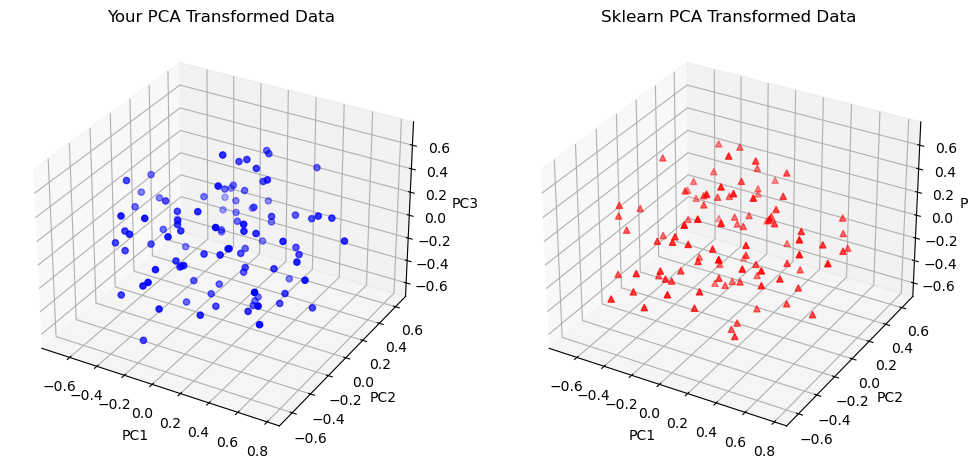

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as SKPCA
from from ZAIScikit.pca import PCA  # Import your PCA module here

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 5)

# Number of principal components
n_components = 3    

# Instantiate your PCA class
pca_transformer = PCA(n_components=n_components)

# Fit and transform data using your PCA
X_transformed_yours = pca_transformer.fit_transform(X)

# Instantiate scikit-learn's PCA
sklearn_pca = SKPCA(n_components=n_components)

# Fit and transform data using scikit-learn's PCA
X_transformed_sklearn = sklearn_pca.fit_transform(X)

# Compare the transformed data
print("Transformed data using your PCA:")
print(X_transformed_yours)

print("\nTransformed data using scikit-learn's PCA:")
print(X_transformed_sklearn)

# Compare the components
print("\nComponents obtained from your PCA:")
print(pca_transformer.components)

print("\nComponents obtained from scikit-learn's PCA:")
print(sklearn_pca.components_)

# Check if the components are almost equal
print("\nAre the components almost equal?")
print(np.allclose(pca_transformer.components, sklearn_pca.components_))

# Check if the transformed data is almost equal
print("\nIs the transformed data almost equal?")
print(np.allclose(X_transformed_yours, X_transformed_sklearn))

# Plot the transformed data in 3D
fig = plt.figure(figsize=(12, 6))

# Plot your PCA transformed data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_transformed_yours[:, 0], X_transformed_yours[:, 1], X_transformed_yours[:, 2], c='b', marker='o')
ax1.set_title("Your PCA Transformed Data")
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Plot sklearn PCA transformed data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_transformed_sklearn[:, 0], X_transformed_sklearn[:, 1], X_transformed_sklearn[:, 2], c='r', marker='^')
ax2.set_title("Sklearn PCA Transformed Data")
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.show()

Model 0
Time to fit : 0.39688350004144013 s
Performance : 0.8924


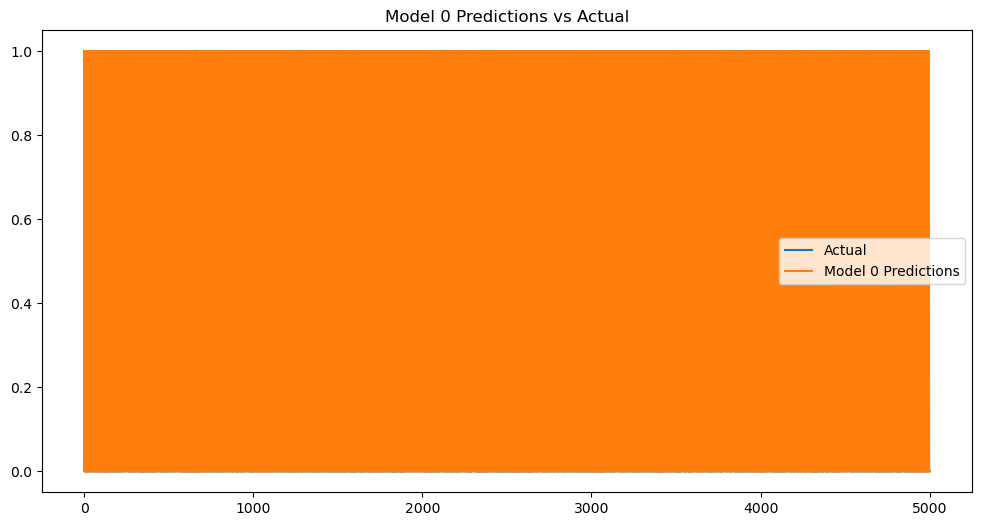

Model 1
Time to fit : 164.15333500003908 s
Performance : 0.8676


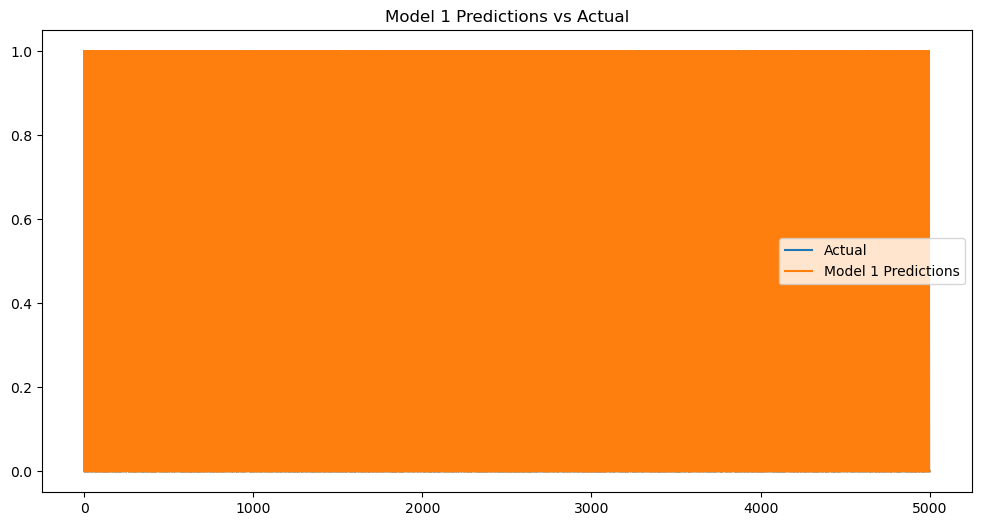

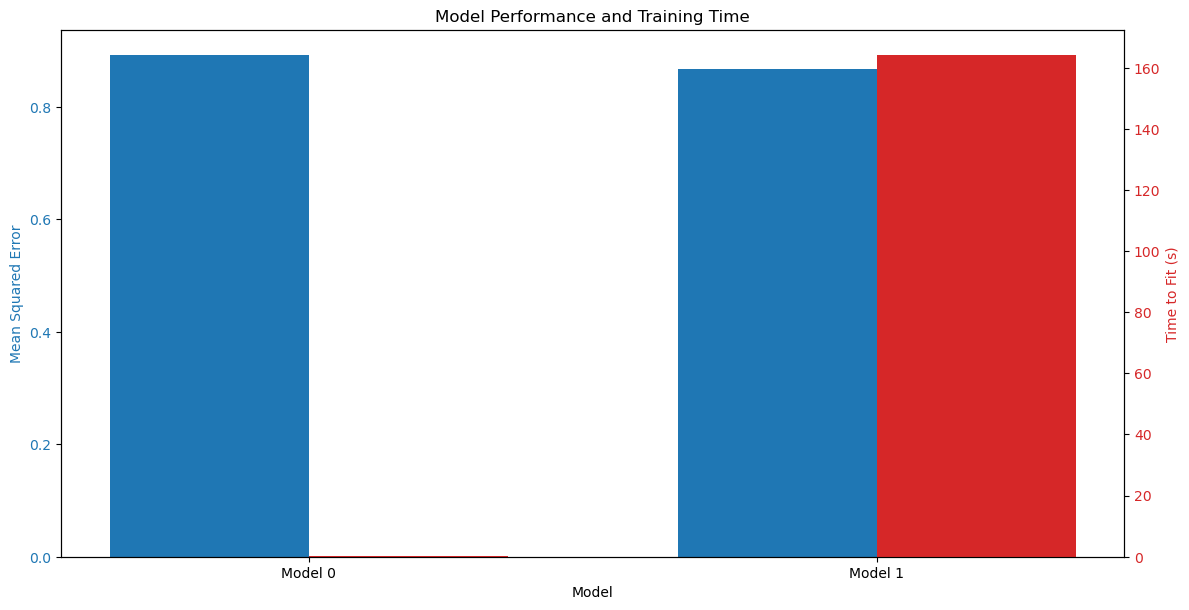

In [14]:
from ZAIScikit.linear_models import SVM
from sklearn.svm import SVC as SKSVC

# Generate random data for binary classification
X, y = make_classification(n_samples=5000, n_features=5, n_classes=2, random_state=42)

# Instantiate your SVM class
svm = SVM()

# Instantiate scikit-learn's SVM
sklearn_svm = SKSVC()

# Compare the models
compareModels([sklearn_svm, svm], [X, X], [y, y], accuracy_score)

Model 0
Time to fit : 0.004296099999919534 s
Performance : 0.869


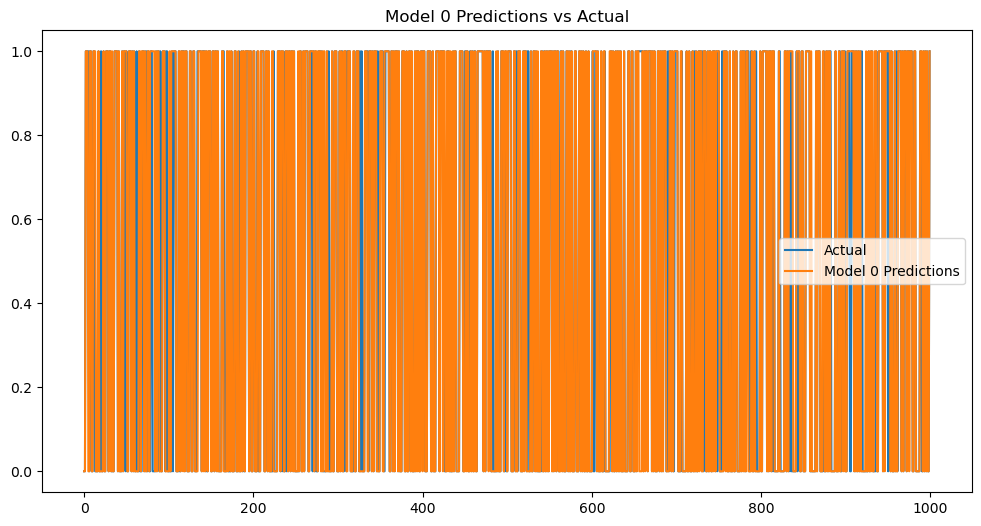

Model 1
Time to fit : 0.40916529996320605 s
Performance : 0.869


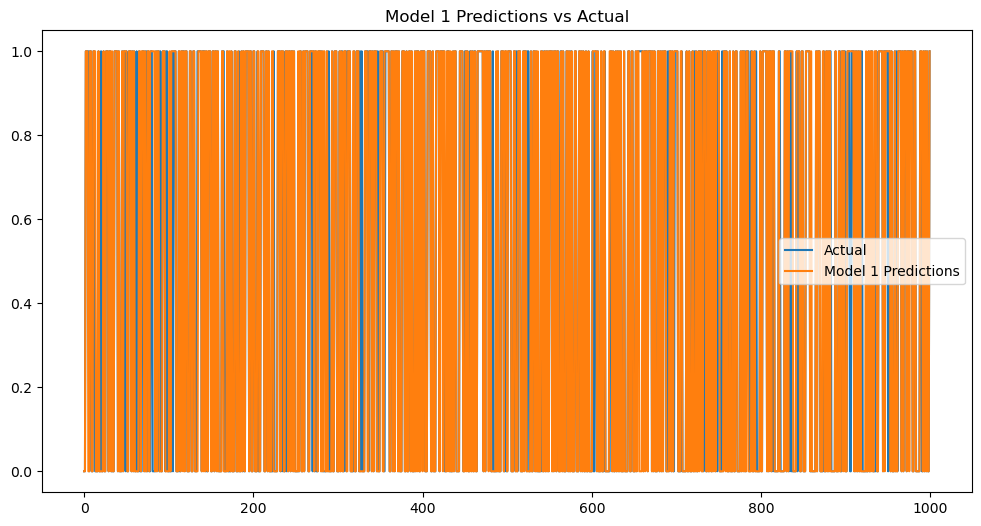

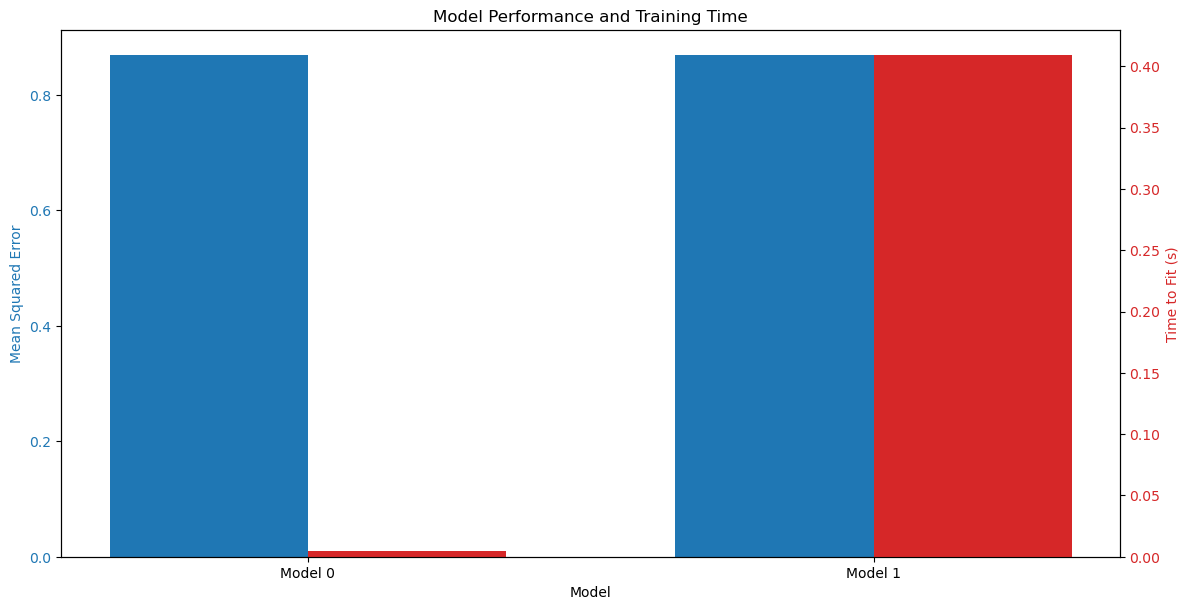

In [15]:
from sklearn.preprocessing import StandardScaler
from ZAIScikit.linear_models import LogisticRegression  # Import your logistic regression module
from sklearn.linear_model import LogisticRegression as SKlogistic

# Generate synthetic data
X, y = make_classification(n_samples=5000, n_features=5, n_classes=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


compareModels([SKlogistic(), LogisticRegression()], [X_train, X_test], [y_train, y_test], accuracy_score)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from ZAIScikit.mlp import *

def compareModelsMLP(models, data, targets, metric):
    X_train, X_test = data
    y_train, y_test = targets
    
    for model in models:
        start = time.perf_counter()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        # Handle the predictions for custom MLP model
        if isinstance(model, MLP):
            predictions = np.array(predictions).squeeze()  # Convert list of arrays to 2D array and remove any extra dimensions
        if predictions.ndim > 1:
            predictions = np.argmax(predictions, axis=1)
        end = time.perf_counter()
        
        print(f"Time to fit : {end - start} s")
        print(f"Performance : {metric(predictions, y_test)}")

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_model = MLP(epochs=1000, learning_rate=0.1)

# Add input layer
input_size = 5  # Number of input features
hidden_layer_sizes = [100, 50]  # Sizes of the hidden layers
output_size = 2  # Number of output classes
mlp_model.add_layer(FullyConnectedLayer(input_size, hidden_layer_sizes[0]))
mlp_model.add_layer(ReLU())

# Add hidden layers
for i in range(len(hidden_layer_sizes) - 1):
    mlp_model.add_layer(FullyConnectedLayer(hidden_layer_sizes[i], hidden_layer_sizes[i+1]))
    mlp_model.add_layer(ReLU())

# Add output layer
mlp_model.add_layer(FullyConnectedLayer(hidden_layer_sizes[-1], output_size))
mlp_model.add_layer(Softmax())

# Initialize scikit-learn's MLPClassifier
sklearn_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

compareModelsMLP([sklearn_mlp, mlp_model], [X_train, X_test], [y_train, y_test], accuracy_score)

c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Time to fit : 1.7172291000024416 s
Performance : 0.895
Time to fit : 124.6172782999929 s
Performance : 0.515


In [19]:
def compareModelsWithPlot(models_func, depths, data, targets, metric):
    all_performances = []
    all_times = []
    
    for depth in depths:
        print(f"Depth {depth} ==========================================")
        models = models_func(depth)
        
        performances = []
        times = []

        for i, model in enumerate(models):
            print(f"Model {i}")
            start = time.perf_counter()
            model.fit(X_train, y_train)
            end = time.perf_counter()
            
            predictions = model.predict(X_test)
            performance = metric(y_test, predictions)
            time_taken = end - start
            
            print(f"Time to fit : {time_taken} s")
            print(f"Performance : {performance}")
            
            performances.append(performance)
            times.append(time_taken)
        all_performances.append(performances)
        all_times.append(times)
    
    all_performances = np.array(all_performances)
    all_times = np.array(all_times)
    
    # Plotting performance differences
    labels = [f'Model {i}' for i in range(len(models))]
    x = np.arange(len(depths))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    color = 'tab:blue'
    ax1.set_xlabel('Tree Depth')
    ax1.set_ylabel('Mean Squared Error', color=color)
    for i in range(all_performances.shape[1]):
        ax1.plot(depths, all_performances[:, i], label=f'Model {i}')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend()
    ax1.set_title('Performance of Models by Tree Depth')

    fig.tight_layout()
    plt.show()

    # Plotting time differences
    fig, ax2 = plt.subplots(figsize=(12, 6))
    
    color = 'tab:red'
    ax2.set_xlabel('Tree Depth')
    ax2.set_ylabel('Time to Fit (s)', color=color)
    for i in range(all_times.shape[1]):
        ax2.plot(depths, all_times[:, i], label=f'Model {i}', linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend()
    ax2.set_title('Training Time of Models by Tree Depth')

    fig.tight_layout()
    plt.show()


Depth 3 ==========================================
Model 0
Time to fit : 0.003060599963646382 s
Performance : 4901.238641239901
Model 1


c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time to fit : 1.8201682000071742 s
Performance : 4848.735854739476
Depth 6 ==========================================
Model 0
Time to fit : 0.005081099981907755 s
Performance : 2538.0615336933442
Model 1


c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time to fit : 3.368880199966952 s
Performance : 2517.3864425047896
Depth 9 ==========================================
Model 0
Time to fit : 0.007225200009997934 s
Performance : 1635.216003480171
Model 1


c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time to fit : 4.801205099967774 s
Performance : 1578.8800319630911
Depth 12 ==========================================
Model 0
Time to fit : 0.00860370002919808 s
Performance : 1509.66527054373
Model 1


c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time to fit : 6.014007300022058 s
Performance : 1482.399303640059
Depth 15 ==========================================
Model 0
Time to fit : 0.009292999980971217 s
Performance : 1463.7279724627783
Model 1


c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time to fit : 7.4755457999999635 s
Performance : 1488.7539117971437
Depth 18 ==========================================
Model 0
Time to fit : 0.01036389998625964 s
Performance : 1571.9779121060506
Model 1


c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time to fit : 7.424782200017944 s
Performance : 1487.5479404376442
Depth 21 ==========================================
Model 0
Time to fit : 0.008798399998340756 s
Performance : 1433.3902321535372
Model 1


c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time to fit : 6.932031300035305 s
Performance : 1487.5479404376442


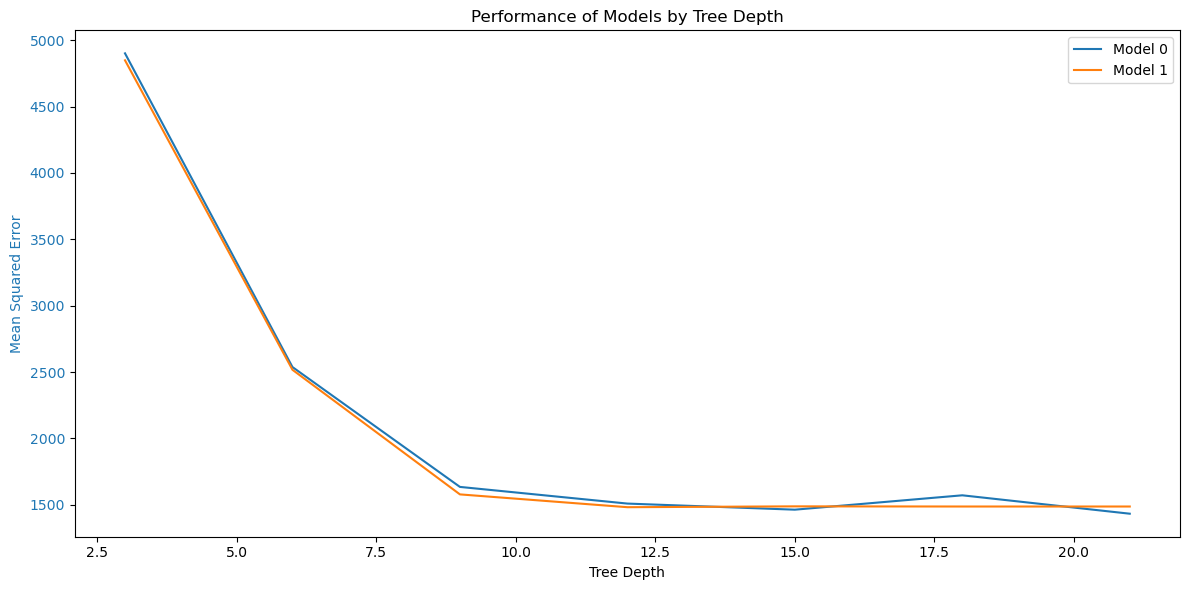

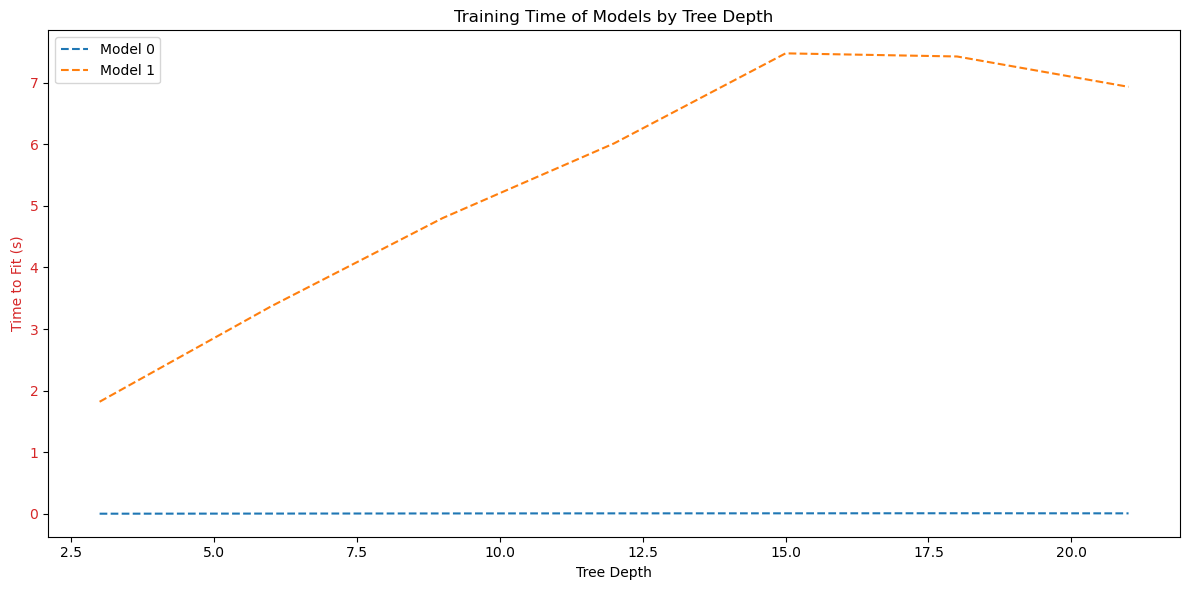

In [20]:
X, y = datasets.make_regression(n_samples=2000, n_features=5, noise=1, bias=19, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

def create_models(depth):
    return [
        DecisionTreeRegressor(max_depth=depth),
        decision_tree.DecisionTreeRegressor(max_depth=depth)  # Replace with your custom implementation if needed
    ]

# Compare models with varying depths and plot results
depths = list(range(3, 24, 3))
compareModelsWithPlot(create_models, depths, (X_train, X_test), (y_train, y_test), mean_squared_error)

Depth 8 ==========================================
Model 0
Time to fit : 0.010085000016260892 s
Performance : 0.9175
Model 1
Time to fit : 3.337024600012228 s
Performance : 0.9125
Depth 13 ==========================================
Model 0
Time to fit : 0.008068400027696043 s
Performance : 0.9
Model 1
Time to fit : 3.531310399994254 s
Performance : 0.9
Depth 18 ==========================================
Model 0
Time to fit : 0.008246999990660697 s
Performance : 0.9
Model 1
Time to fit : 3.626678799977526 s
Performance : 0.9
Depth 23 ==========================================
Model 0
Time to fit : 0.008695900032762438 s
Performance : 0.9075
Model 1
Time to fit : 3.8009250999893993 s
Performance : 0.9


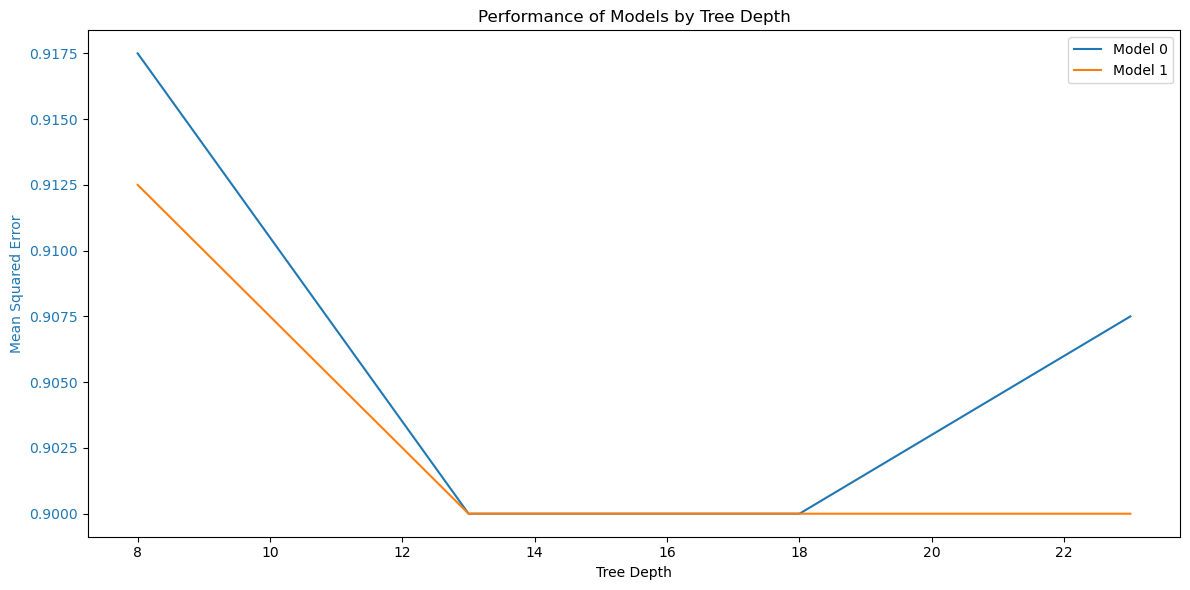

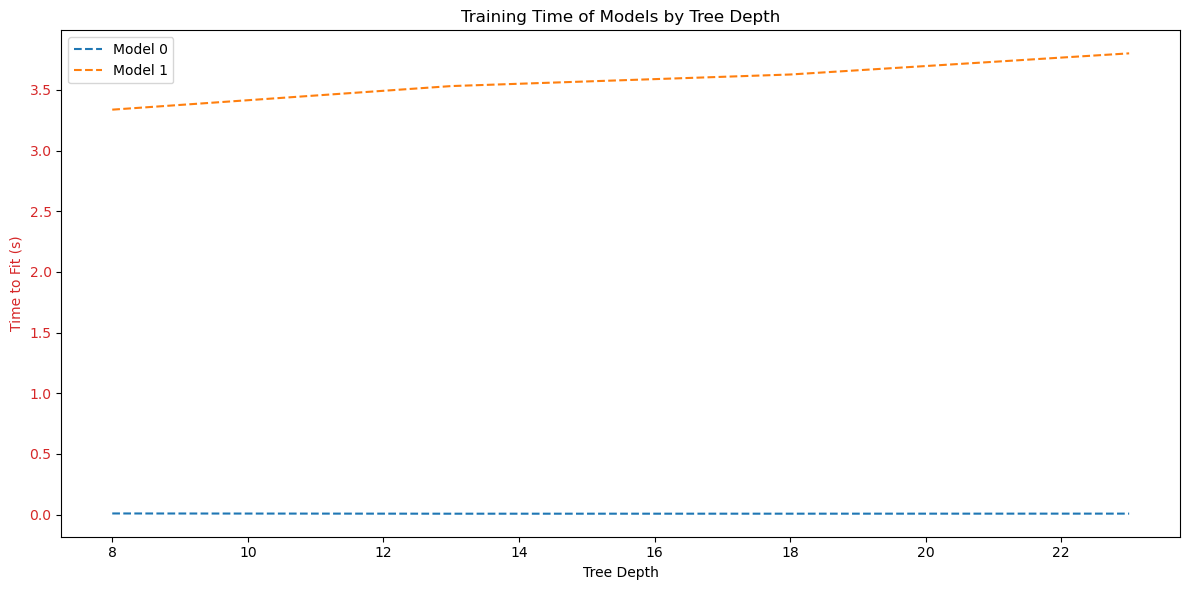

In [21]:
# Generate synthetic data for classification
X, y = make_classification(n_samples=2000, n_features=5, n_classes=2, random_state=4)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Define a function to create model instances with given depth
def create_models(depth):
    return [
        DecisionTreeClassifier(criterion='gini', max_depth=depth),
        decision_tree.DecisionTreeClassifier(criterion='gini', max_depth=depth)  # Replace with your custom implementation if needed
    ]

# Compare models with varying depths and plot results
depths = list(range(8, 24, 5))
compareModelsWithPlot(create_models, depths, (X_train, X_test), (y_train, y_test), accuracy_score)

Depth 8 ==========================================
Model 0
Time to fit : 0.3073077000444755 s
Performance : 0.945
Model 1
Time to fit : 22.34801019995939 s
Performance : 0.91
Depth 13 ==========================================
Model 0
Time to fit : 0.26468110003042966 s
Performance : 0.9375
Model 1
Time to fit : 26.856518500018865 s
Performance : 0.9225
Depth 18 ==========================================
Model 0
Time to fit : 0.316999799979385 s
Performance : 0.9375
Model 1
Time to fit : 27.400221000018064 s
Performance : 0.92
Depth 23 ==========================================
Model 0
Time to fit : 0.2739286000141874 s
Performance : 0.935
Model 1
Time to fit : 26.11064610001631 s
Performance : 0.9225


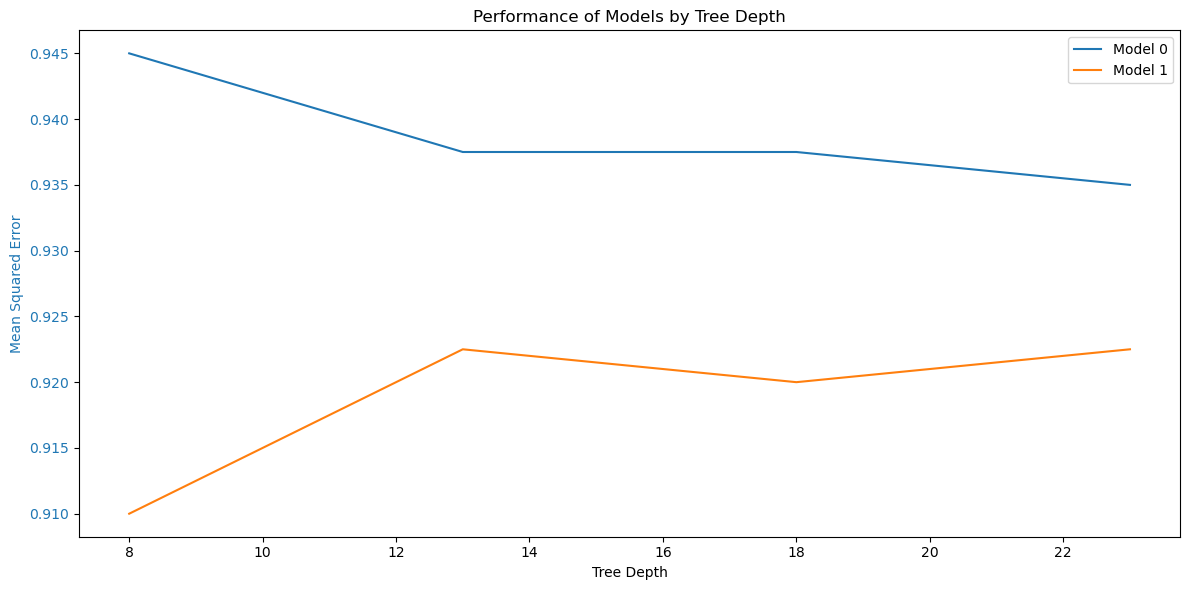

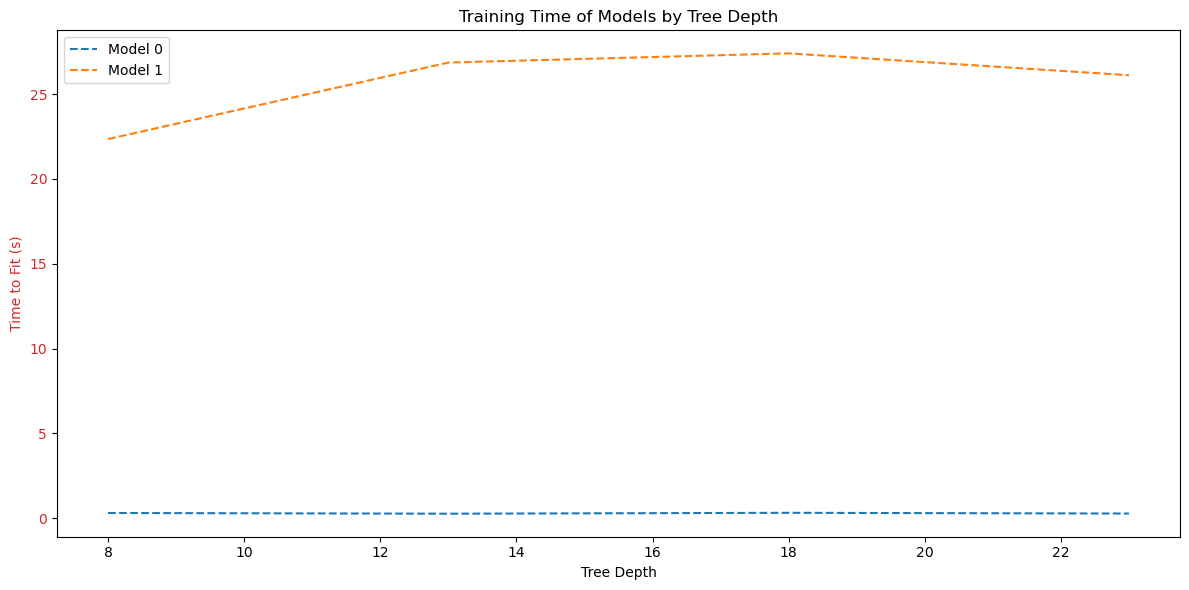

In [22]:
# Generate synthetic data for classification
X, y = make_classification(n_samples=2000, n_features=5, n_classes=2, random_state=4)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Define a function to create model instances with given depth
def create_models(depth):
    return [
        RandomForestClassifier(criterion='gini', max_depth=depth),
        bagging.RandomForestClassifier(criterion='gini', max_depth=depth)  # Replace with your custom implementation if needed
    ]

# Compare models with varying depths and plot results
depths = list(range(8, 24, 5))
compareModelsWithPlot(create_models, depths, (X_train, X_test), (y_train, y_test), accuracy_score)

Depth 10 ==========================================
Model 0
Time to fit : 4.679677700041793 s
Performance : 4728.389953705185
Model 1
Time to fit : 336.05111850000685 s
Performance : 15188.118905165646
Depth 15 ==========================================
Model 0
Time to fit : 4.449928399990313 s
Performance : 3680.297634644726
Model 1
Time to fit : 306.9995617000386 s
Performance : 15520.557698277533
Depth 20 ==========================================
Model 0
Time to fit : 4.582685699977446 s
Performance : 3643.6526712701952
Model 1
Time to fit : 343.27833890001057 s
Performance : 16483.016294792542


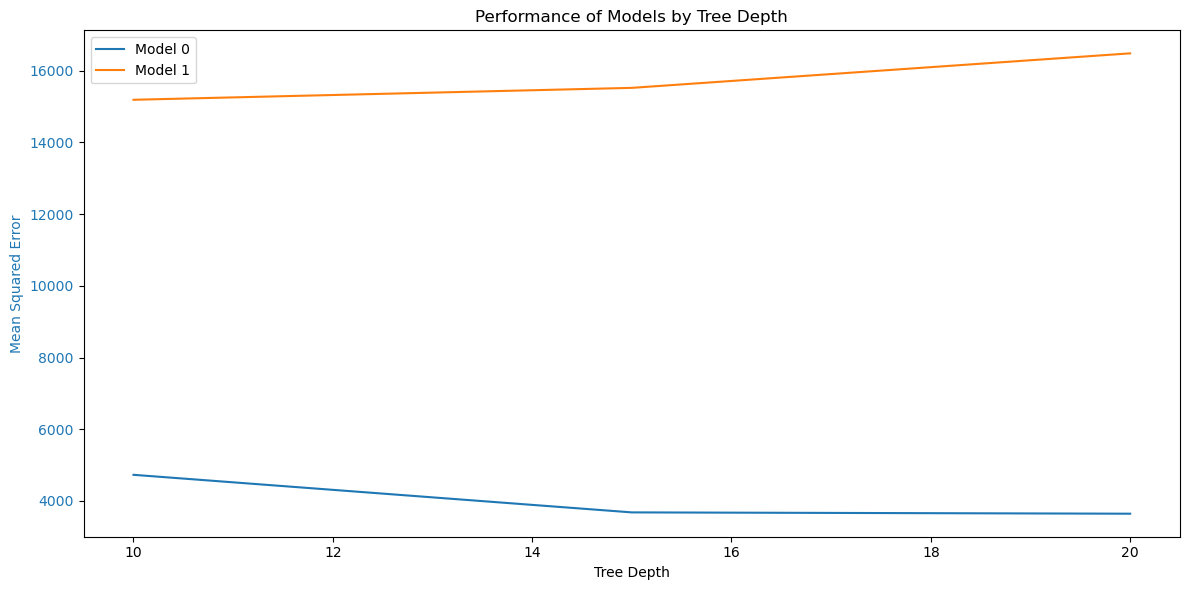

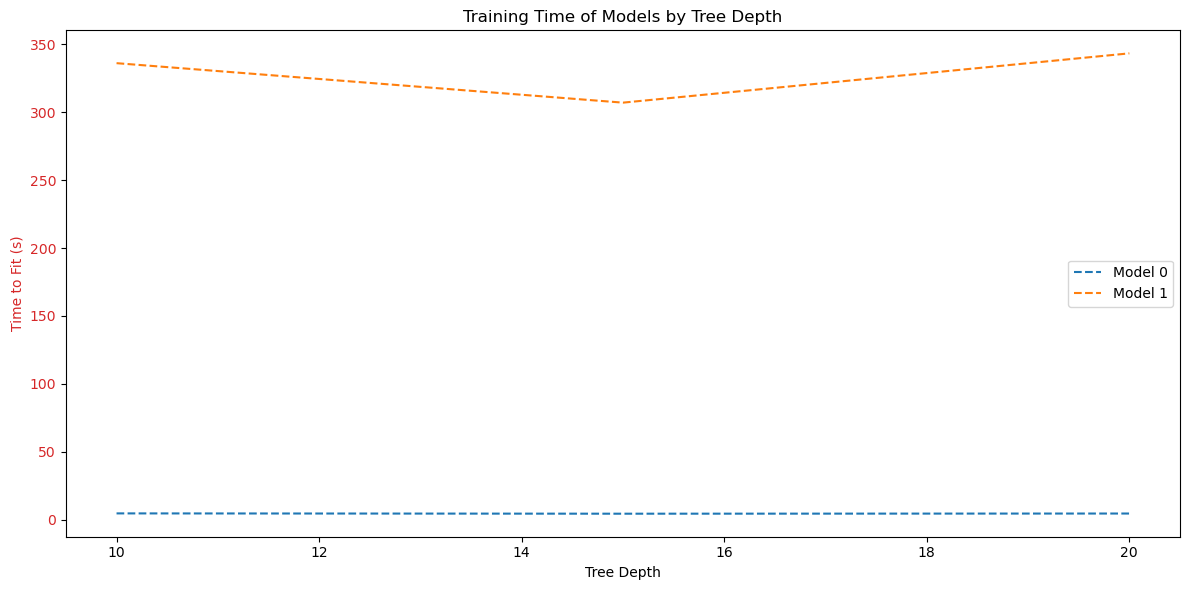

In [23]:
from sklearn.ensemble import RandomForestRegressor

X, y = datasets.make_regression(n_samples=10000, n_features=10, noise=1, bias=19, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

# Define a function to create model instances with given depth
def create_models(depth):
    return [
        RandomForestRegressor(max_depth=depth),
        bagging.RandomForestRegressor(max_depth=depth)  # Replace with your custom implementation if needed
    ]

# Compare models with varying depths and plot results
depths = list(range(10, 24, 5))
compareModelsWithPlot(create_models, depths, (X_train, X_test), (y_train, y_test), mean_squared_error)

Model 0
Time to fit : 0.0012796999653801322 s
Performance : 1.147099656231586


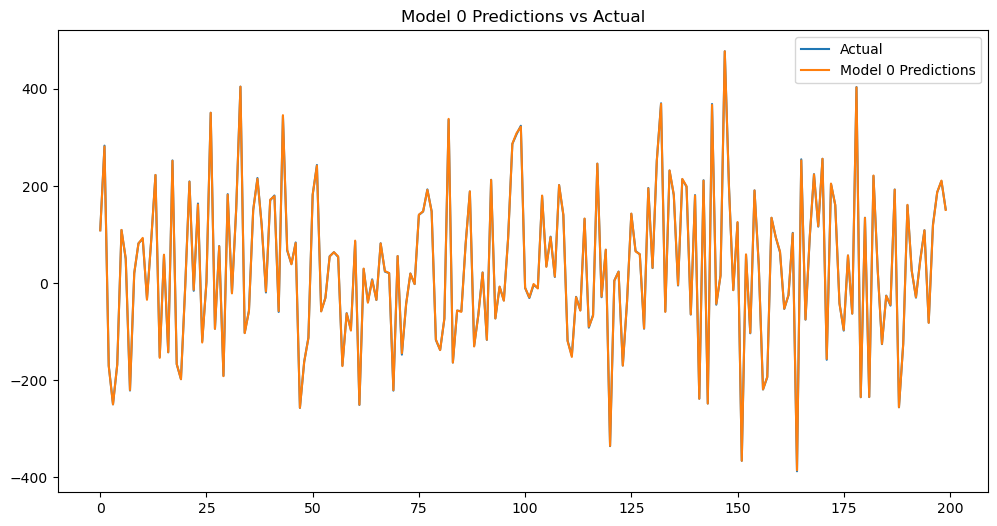

Model 1
Time to fit : 0.12013660004595295 s
Performance : 1.1470996562313867


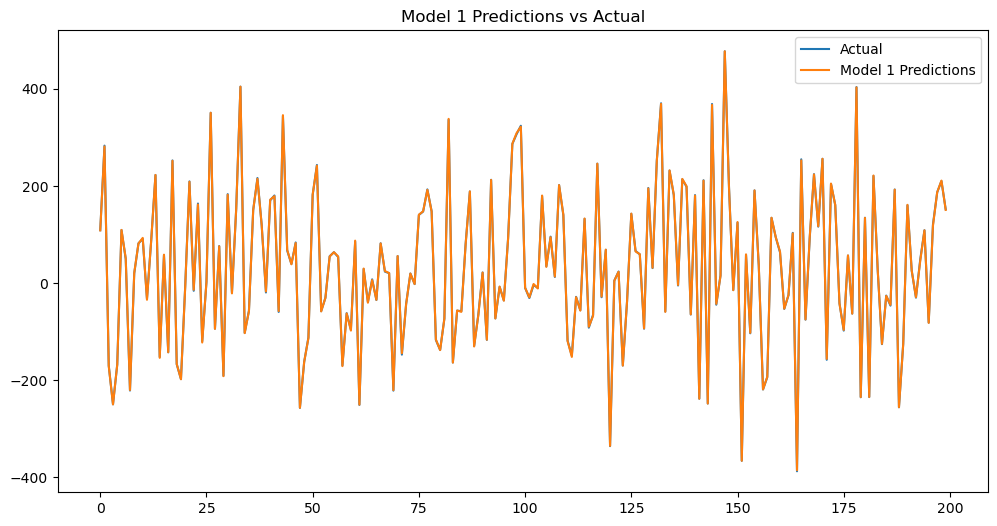

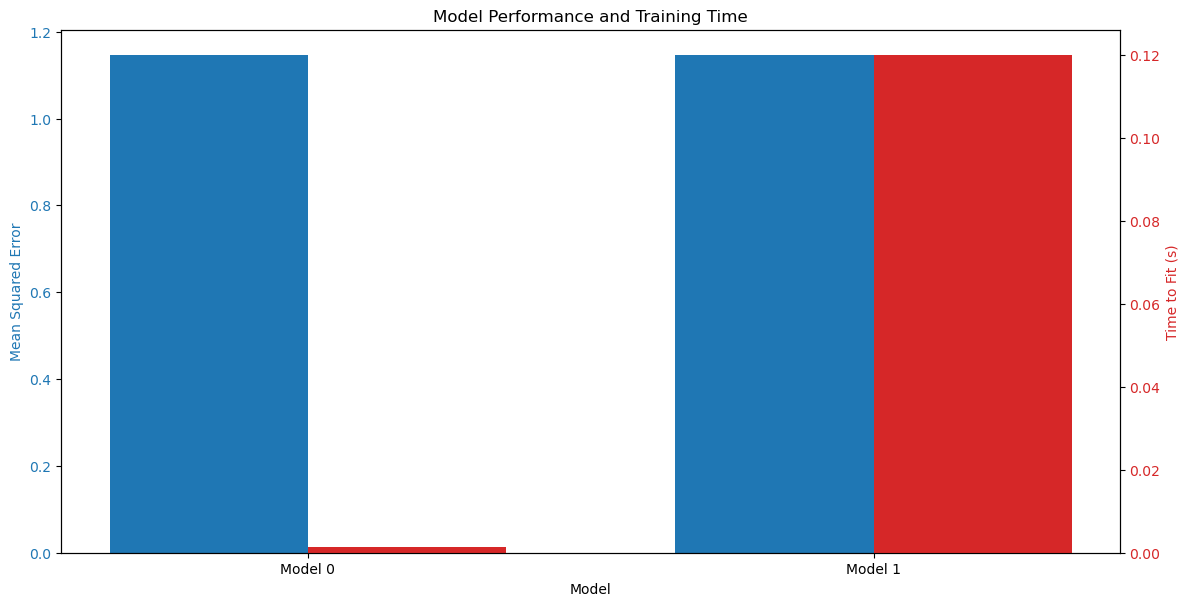

In [25]:
X, y = datasets.make_regression(n_samples=1000, n_features=10, noise=1, bias=19, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

models = [LinearRegression(), linear_models.LinearRegression()]
compareModels(models, (X_train, X_test), (y_train, y_test), mean_squared_error)

Model 0
Time to fit : 0.003701200010254979 s
Performance : 0.7906666666666666


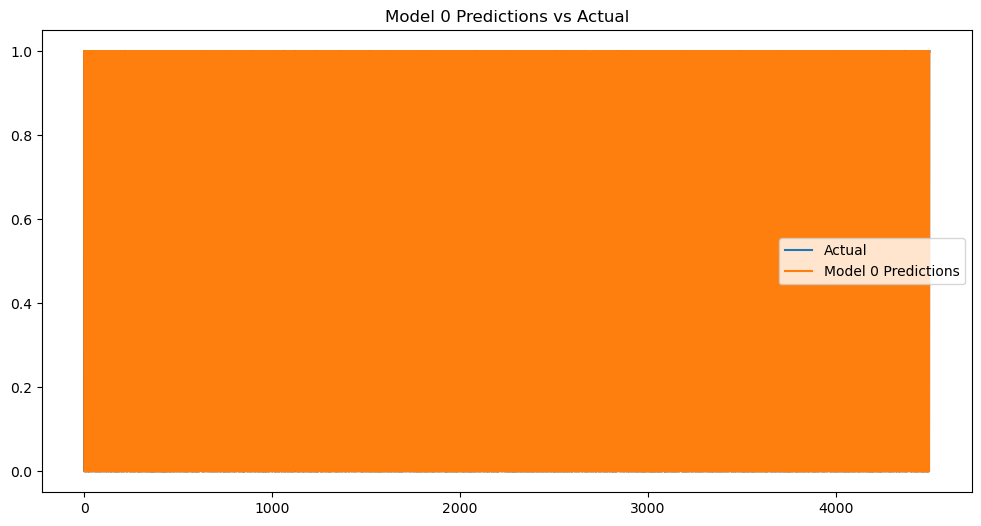

Model 1
Time to fit : 0.03666340000927448 s
Performance : 0.8915555555555555


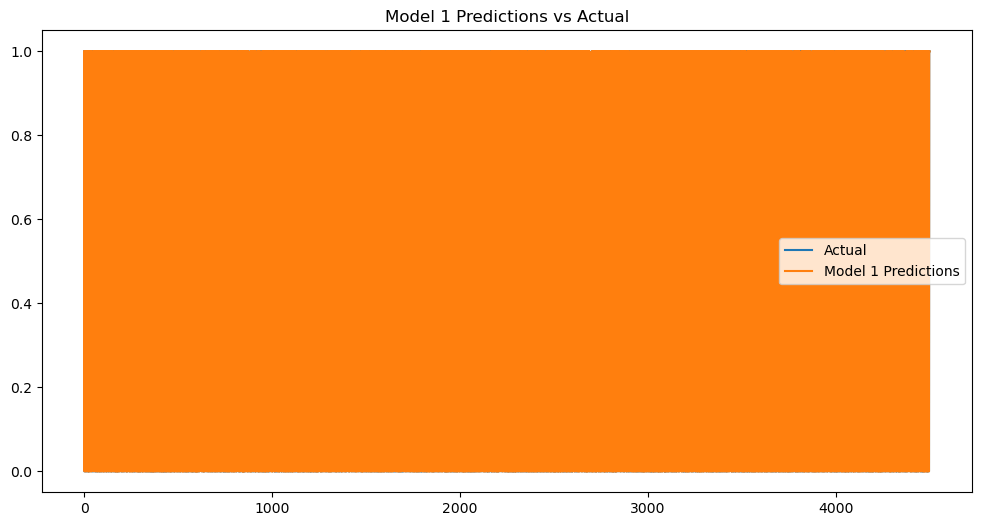

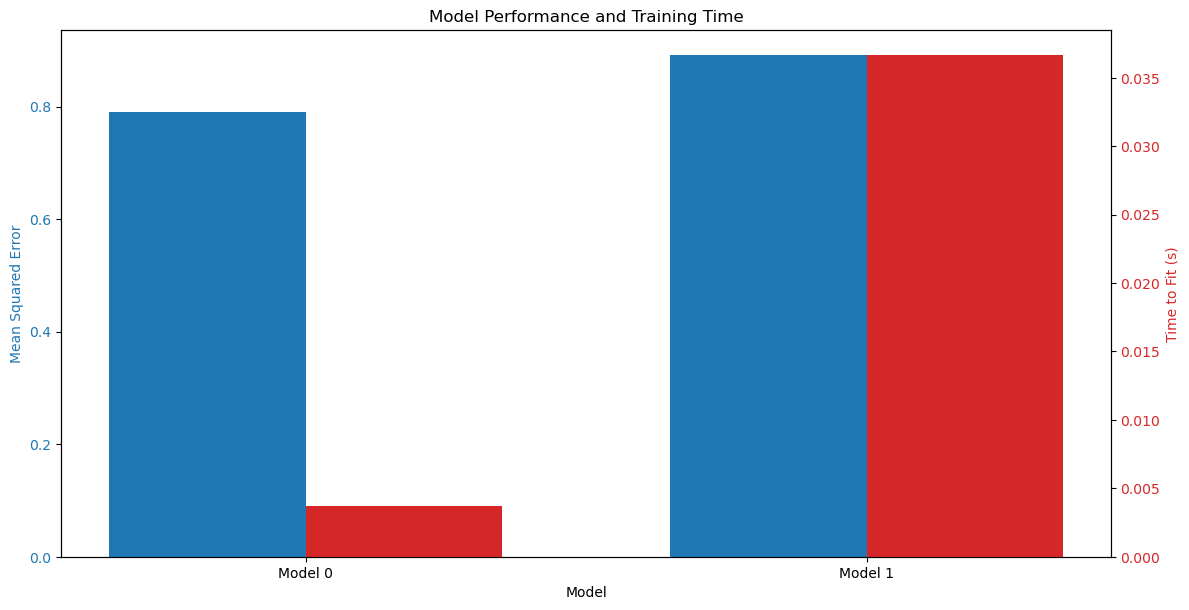

In [26]:
X, y = datasets.make_classification(n_samples=18000, n_features=5, n_informative=5, n_redundant=0, n_classes=2, random_state=19)

X_categorical = pd.DataFrame()
for i in range(X.shape[1]):
    categorical_feature = pd.cut(X[:, i], bins=5, labels=[j for j in range(5)])
    X_categorical[f'feature_{i}'] = categorical_feature

X = X_categorical.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

models = [MultinomialNB(), naive_bayes.NaiveBayes()]
compareModels(models, (X_train, X_test), (y_train, y_test), accuracy_score)

Depth 5 ==========================================
Model 0
Time to fit : 0.0021493000094778836 s
Performance : 0.876
Model 1
Time to fit : 2.589996438473463e-05 s
Performance : 0.876
Depth 15 ==========================================
Model 0
Time to fit : 0.00133200001437217 s
Performance : 0.86
Model 1
Time to fit : 2.19999928958714e-05 s
Performance : 0.86
Depth 25 ==========================================
Model 0
Time to fit : 0.0011166000040248036 s
Performance : 0.864
Model 1
Time to fit : 2.559996210038662e-05 s
Performance : 0.864


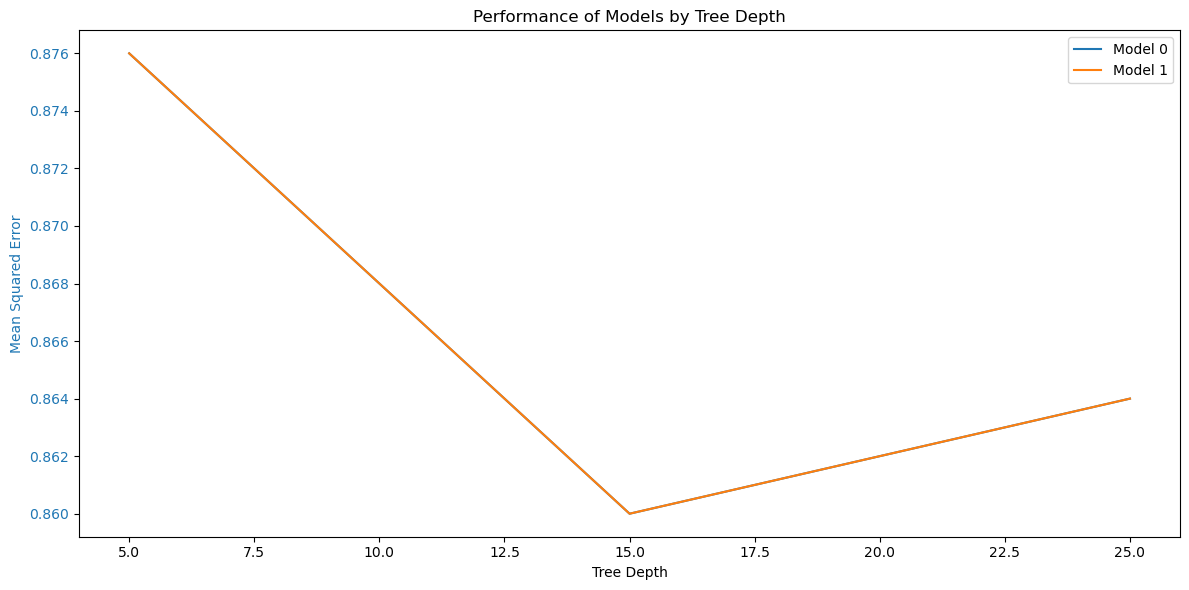

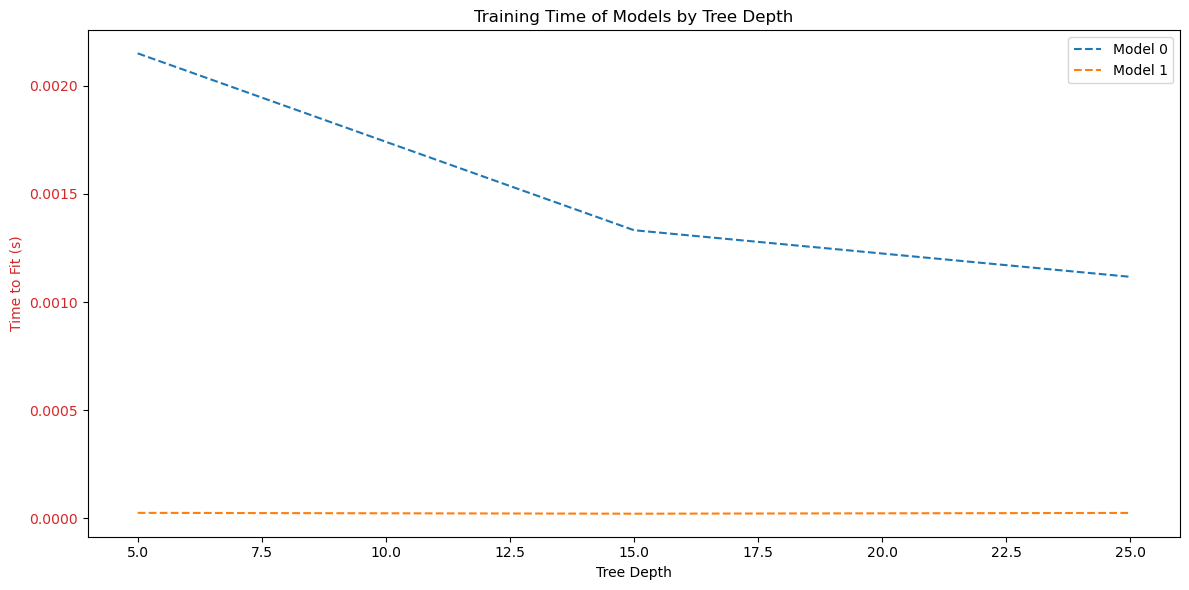

In [27]:
X, y = datasets.make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, n_classes=3, random_state=19)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

# Define a function to create model instances with given depth
def create_models(k):
    return [
        KNeighborsClassifier(n_neighbors=k),
        nearest_neighbors.KNN(k=k)  # Replace with your custom implementation if needed
    ]

# Compare models with varying depths and plot results
depths = list(range(5, 31, 10))
compareModelsWithPlot(create_models, depths, (X_train, X_test), (y_train, y_test), accuracy_score)

Model 0
Time to fit : 0.0009896000265143812 s
Performance : 0.9666666666666667


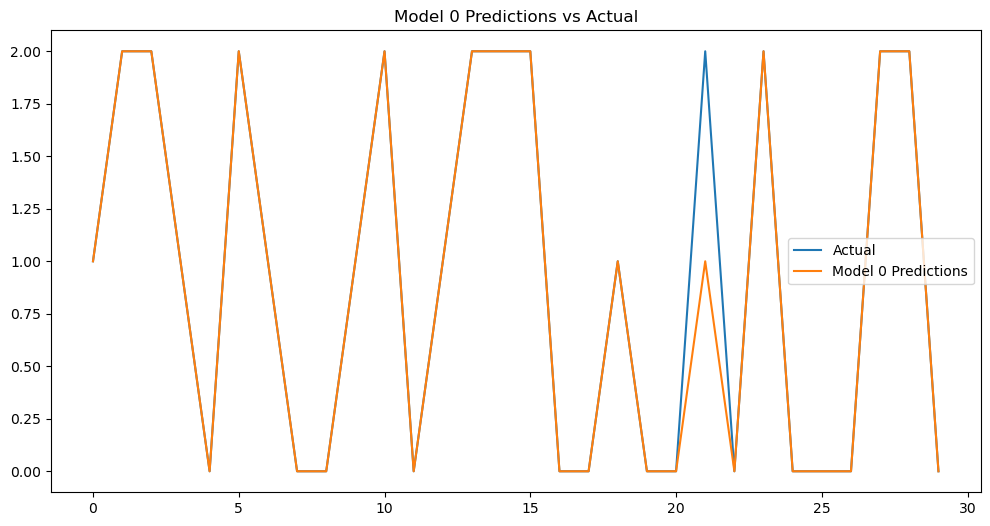

Model 1
Time to fit : 0.00031269999453797936 s
Performance : 0.9666666666666667


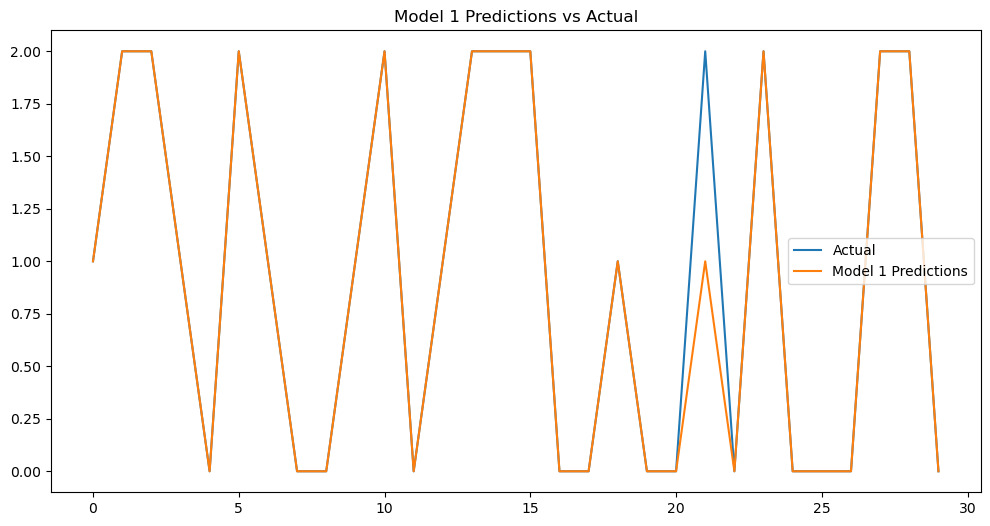

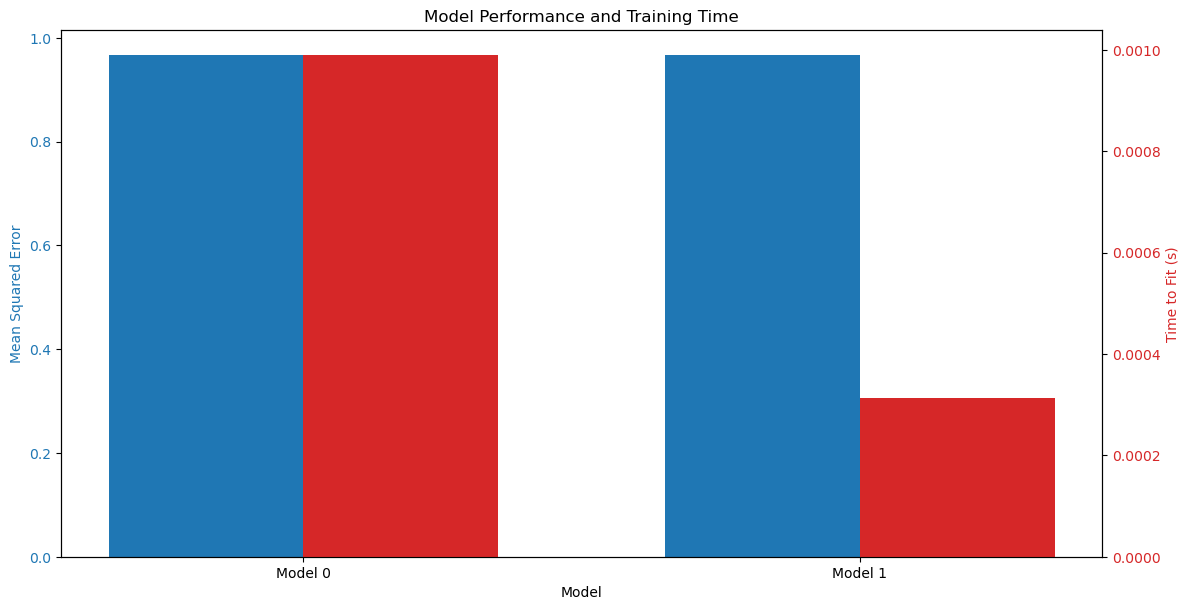

In [28]:
# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

models = [GaussianNB(), naive_bayes.GaussianNaiveBayes()]

compareModels(models, (X_train, X_test), (y_train, y_test), accuracy_score)

Model 0
Time to fit : 0.19624710001517087 s
Performance : 0.9666666666666667


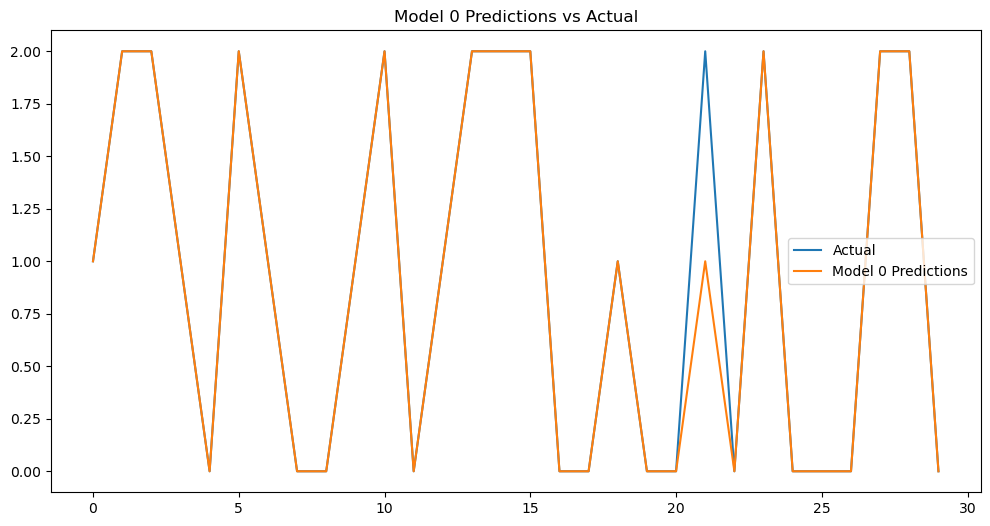

Model 1


c:\Users\Apo\Desktop\{} - Computer Science\AI\Z-MachineLearningLibrary\boosting.py:31: RuntimeWarning: invalid value encountered in log
  self.init_pred = np.log(np.sum(y) / (len(y) - np.sum(y)))
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Apo\anaconda3\envs\MLearning\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Time to fit : 0.6003815999720246 s
Performance : 0.43333333333333335


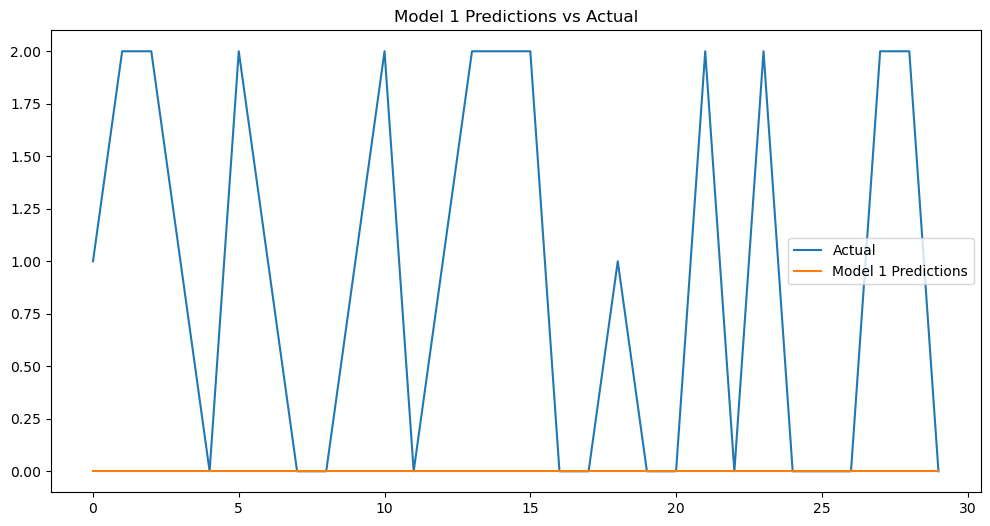

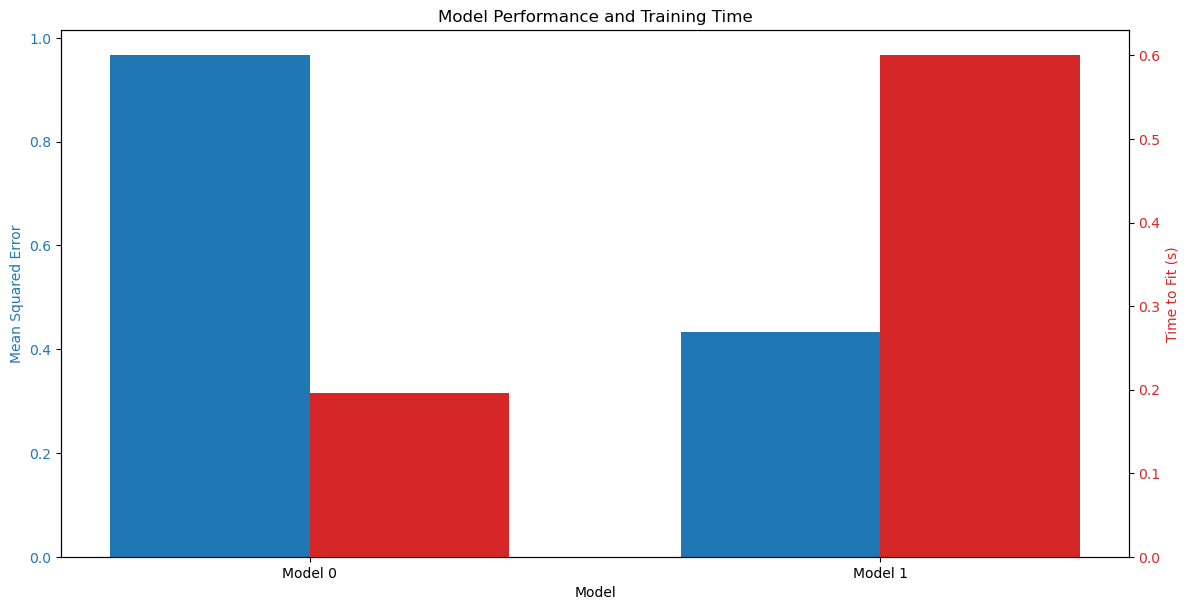

In [29]:
# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

models = [SklearnGBC(n_estimators=100, learning_rate=0.1, max_depth=3), GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)]

compareModels(models, (X_train, X_test), (y_train, y_test), accuracy_score)

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # AdaBoost in sklearn handles labels {0, 1}, converting to {-1, 1} for custom model

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [SklearnAdaBoost(n_estimators=30, random_state=42, algorithm='SAMME'), AdaBoostClassifier(n_clf=30)]

compareModels(models, (X_train, X_test), (y_train, y_test), accuracy_score)

Custom AdaBoost Accuracy: 0.915
Sklearn AdaBoost Accuracy: 0.925
Custom AdaBoost Sample Probabilities: [[0.84746598 0.15253402]]
Sklearn AdaBoost Sample Probabilities: [[0.56511477 0.43488523]]


In [ ]:
# Generating synthetic data
np.random.seed(0)
X, _ = make_classification(n_samples=100, n_features=5, random_state=42)
X = X.astype(float)
X[::4, 1] = np.nan  # Introduce missing values in the second column
X[::3, 3] = np.nan  # Introduce missing values in the fourth column

# Split the dataset to demonstrate usage
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define custom and sklearn imputers
imputers = {
    "mean": (SimpleImputer(strategy="mean"), SklearnSimpleImputer(strategy="mean")),
    "median": (SimpleImputer(strategy="median"), SklearnSimpleImputer(strategy="median")),
    "mode": (SimpleImputer(strategy="mode"), SklearnSimpleImputer(strategy="most_frequent")),
    "knn": (KNNImputer(), SklearnKNNImputer()),
    # "iterative": (IterativeImputer(), SklearnIterativeImputer())
}

# Test each imputer
for name, (custom_imputer, sklearn_imputer) in imputers.items():
    custom_filled = custom_imputer.fit_transform(X_train)
    sklearn_filled = sklearn_imputer.fit_transform(X_train)

    # Compare using MSE to evaluate how close the custom implementation is to sklearn's
    mse = mean_squared_error(custom_filled, sklearn_filled)
    print(f"{name.capitalize()} Imputer MSE between custom and sklearn: {mse:.4f}")

Mean Imputer MSE between custom and sklearn: 0.0000
Median Imputer MSE between custom and sklearn: 0.0000
Mode Imputer MSE between custom and sklearn: 0.0000
Knn Imputer MSE between custom and sklearn: 0.0745


In [ ]:
def cross_val_score(model, X, y, scoring, cv=None):
    if cv is None:
        cv = KFold()

    scores = []
    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        score = scoring(y_test, predictions)
        scores.append(score)
    
    return np.array(scores)

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Define the scoring function
def accuracy_scorer(y_true, y_pred):
    return np.mean(y_true == y_pred)    

# Use custom KFold and cross-validation
custom_cv = KFold(n_splits=3, shuffle=True, random_state=42)
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring=accuracy_scorer, cv=custom_cv)
print("Custom Implementation Scores:", scores)

# Compare with scikit-learn's implementation
sk_scores = sk_cross_val_score(DecisionTreeClassifier(), X, y, cv=3)
print("Scikit-Learn Implementation Scores:", sk_scores)

Custom Implementation Scores: [0.94 0.96 0.96]
Scikit-Learn Implementation Scores: [0.98 0.92 1.  ]


In [ ]:
# Load Iris dataset
data = datasets.load_iris()
X, y = data.data, data.target

# Define cross-validation setup
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Parameter grid
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 4]
}

# Custom GridSearchCV implementation
custom_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring=accuracy_scorer,
    cv=kfolds
)

# Fit custom Grid Search
custom_grid_search.fit(X, y)
print("Custom GridSearchCV - Best Parameters:", custom_grid_search.best_params())
print("Custom GridSearchCV - Best Score:", custom_grid_search.best_score())

# Scikit-learn GridSearchCV
sklearn_grid_search = SklearnGridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3  # Number of folds, directly passed as an int to use default KFold in sklearn
)

# Fit scikit-learn Grid Search
sklearn_grid_search.fit(X, y)
print("Sklearn GridSearchCV - Best Parameters:", sklearn_grid_search.best_params_)
print("Sklearn GridSearchCV - Best Score:", sklearn_grid_search.best_score_)


Custom GridSearchCV - Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Custom GridSearchCV - Best Score: 0.9533333333333333
Sklearn GridSearchCV - Best Parameters: {'max_depth': None, 'min_samples_split': 4}
Sklearn GridSearchCV - Best Score: 0.9733333333333333


In [ ]:
# Load Iris dataset
data = datasets.load_iris()
X, y = data.data, data.target

# Using the custom train_test_split
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X, y, test_size=0.2, random_state=42)

# Using scikit-learn's train_test_split
X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = sklearn_train_test_split(X, y, test_size=0.2, random_state=42)

# Compare the outputs
print("Custom Implementation:")
print("Train shapes (X, y):", X_train_custom.shape, y_train_custom.shape)
print("Test shapes (X, y):", X_test_custom.shape, y_test_custom.shape)

print("\nSklearn Implementation:")
print("Train shapes (X, y):", X_train_sklearn.shape, y_train_sklearn.shape)
print("Test shapes (X, y):", X_test_sklearn.shape, y_test_sklearn.shape)


Custom Implementation:
Train shapes (X, y): (120, 4) (120,)
Test shapes (X, y): (30, 4) (30,)

Sklearn Implementation:
Train shapes (X, y): (120, 4) (120,)
Test shapes (X, y): (30, 4) (30,)


In [ ]:
# Generate synthetic data
categories = ['red', 'green', 'blue']
data = np.random.choice(categories, size=100, replace=True)
data = data.reshape(-1, 1)  # Reshape for compatibility with encoders

# Initialize encoders
custom_one_hot_encoder = OneHotEncoder()
sklearn_one_hot_encoder = SklearnOneHotEncoder(sparse=False)

custom_label_encoder = LabelEncoder()
sklearn_label_encoder = SklearnLabelEncoder()

# Properly initialize OrdinalEncoder with an order
custom_ordinal_encoder = OrdinalEncoder(order=sorted(categories))
sklearn_ordinal_encoder = SklearnOrdinalEncoder(categories=[sorted(categories)])

def test_encoders(data):
    # One-Hot Encoding
    custom_one_hot_encoded = custom_one_hot_encoder.fit_transform(data)
    sklearn_one_hot_encoded = sklearn_one_hot_encoder.fit_transform(data)
    
    # Label Encoding - requires flattened data for Sklearn
    custom_label_encoded = custom_label_encoder.fit_transform(data.flatten())
    sklearn_label_encoded = sklearn_label_encoder.fit_transform(data.flatten())
    
    # Ordinal Encoding - custom implementation and sklearn
    custom_ordinal_encoded = custom_ordinal_encoder.fit_transform(data.flatten())
    sklearn_ordinal_encoded = sklearn_ordinal_encoder.fit_transform(data)

    # Compare results
    one_hot_difference = np.sum(custom_one_hot_encoded != sklearn_one_hot_encoded)
    total_elements = np.prod(sklearn_one_hot_encoded.shape)
    label_mse = mean_squared_error(custom_label_encoded, sklearn_label_encoded)
    ordinal_mse = mean_squared_error(custom_ordinal_encoded, sklearn_ordinal_encoded)

    print("One-Hot Encoding Total Different Elements:", one_hot_difference)
    print("One-Hot Encoding Percentage Difference:", one_hot_difference / total_elements)
    print("Label Encoding MSE:", label_mse)
    print("Ordinal Encoding MSE:", ordinal_mse)
    print("Custom One-Hot Shape:", custom_one_hot_encoded.shape)
    print("Sklearn One-Hot Shape:", sklearn_one_hot_encoded.shape)
    print("Custom One-Hot Example:", custom_one_hot_encoded[0])
    print("Sklearn One-Hot Example:", sklearn_one_hot_encoded[0])
    print("Custom Data Type:", custom_one_hot_encoded.dtype)
    print("Sklearn Data Type:", sklearn_one_hot_encoded.dtype)

# Run tests
test_encoders(data)


One-Hot Encoding Total Different Elements: 0
One-Hot Encoding Percentage Difference: 0.0
Label Encoding MSE: 0.0
Ordinal Encoding MSE: 0.0
Custom One-Hot Shape: (100, 3)
Sklearn One-Hot Shape: (100, 3)
Custom One-Hot Example: [1. 0. 0.]
Sklearn One-Hot Example: [1. 0. 0.]
Custom Data Type: float64
Sklearn Data Type: float64


In [ ]:
# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, random_state=42)

def compare_selected_features(custom_selector, sklearn_selector, name):
    # Fit custom selector
    custom_selector.fit(X, y)
    custom_selected_indices = custom_selector.indices_

    # Fit sklearn selector
    sklearn_selector.fit(X, y)
    sklearn_support = sklearn_selector.get_support()
    sklearn_selected_indices = np.where(sklearn_support)[0]

    # Calculate overlap and differences
    intersection = np.intersect1d(custom_selected_indices, sklearn_selected_indices)
    difference = np.setdiff1d(custom_selected_indices, sklearn_selected_indices)

    # Report
    print(f"{name} - Custom selected indices: {custom_selected_indices}")
    print(f"{name} - Sklearn selected indices: {sklearn_selected_indices}")
    print(f"{name} - Intersection: {intersection}")
    print(f"{name} - Difference: {difference}")
    print(f"{name} - Overlap Percentage: {len(intersection) / len(sklearn_selected_indices) * 100:.2f}%\n")

# SelectKBest Comparison
custom_kbest = SelectKBest(score_func=f_classif, k=5)
sklearn_kbest = SklearnSelectKBest(score_func=f_classif, k=5)
compare_selected_features(custom_kbest, sklearn_kbest, "SelectKBest")

# SelectFromModel Comparison
custom_model_selector = SelectFromModel(model=RandomForestClassifier(random_state=42), threshold="mean")
sklearn_model_selector = SklearnSelectFromModel(estimator=RandomForestClassifier(random_state=42), threshold="mean")
compare_selected_features(custom_model_selector, sklearn_model_selector, "SelectFromModel")

# RFE Comparison
custom_rfe_selector = RFE(model=RandomForestClassifier(random_state=42), n_features_to_select=5)
sklearn_rfe_selector = SklearnRFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
compare_selected_features(custom_rfe_selector, sklearn_rfe_selector, "RFE")


SelectKBest - Custom selected indices: [ 9  3 18  0 10]
SelectKBest - Sklearn selected indices: [ 0  3  9 10 18]
SelectKBest - Intersection: [ 0  3  9 10 18]
SelectKBest - Difference: []
SelectKBest - Overlap Percentage: 100.00%

SelectFromModel - Custom selected indices: [ 0  1  3  9 10 11 18 19]
SelectFromModel - Sklearn selected indices: [ 0  1  3  9 10 11 18 19]
SelectFromModel - Intersection: [ 0  1  3  9 10 11 18 19]
SelectFromModel - Difference: []
SelectFromModel - Overlap Percentage: 100.00%

RFE - Custom selected indices: [0, 3, 9, 10, 18]
RFE - Sklearn selected indices: [ 0  3  9 10 18]
RFE - Intersection: [ 0  3  9 10 18]
RFE - Difference: []
RFE - Overlap Percentage: 100.00%

